 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [270]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [271]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")
whale_returns = pd.read_csv(whale_returns_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)

In [272]:
whale_returns.sort_index(ascending = True, inplace = True)
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [273]:
# Count nulls
print(whale_returns.isnull().sum())
print(whale_returns[whale_returns.isnull().any(axis = 1)])

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64
            SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-02                        NaN                 NaN   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2015-03-02                          NaN                     NaN  


In [274]:
# Drop nulls
whale_returns.dropna(inplace=True)
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [275]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
algo_returns = pd.read_csv(algo_returns_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
algo_returns.sort_index(ascending = True, inplace = True)
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [276]:
# Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [277]:
# Drop nulls
algo_returns.dropna(inplace = True)
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [278]:
# Reading S&P TSX 60 Closing Prices
sp_tsx_history_csv = Path("Resources/sp_tsx_history.csv")
sp_tsx_history = pd.read_csv(sp_tsx_history_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
sp_tsx_history.sort_index(ascending = True, inplace = True)
sp_tsx_history.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [279]:
# Check Data Types
sp_tsx_history.dtypes

Close    object
dtype: object

In [280]:
# Fix Data Types
sp_tsx_history["Close"] = sp_tsx_history["Close"].str.replace('$','')


In [281]:
# Removing commas
sp_tsx_history["Close"] = sp_tsx_history["Close"].apply(lambda x: float(x.split()[0].replace(',', '')))
sp_tsx_history.head()

,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99


In [282]:
# Calculate Daily Returns

sp_daily_returns = sp_tsx_history.pct_change()


In [283]:
# Drop nulls
sp_daily_returns.dropna(inplace = True)
sp_daily_returns.head()

,Close
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


In [284]:
# Rename `Close` Column to be specific to this portfolio.
sp_daily_returns.rename(columns = {"Close":"sptsx60"}, inplace = True)

## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [285]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
df_daily = pd.concat([whale_returns, algo_returns,sp_daily_returns], axis = "columns",join = "inner")

---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

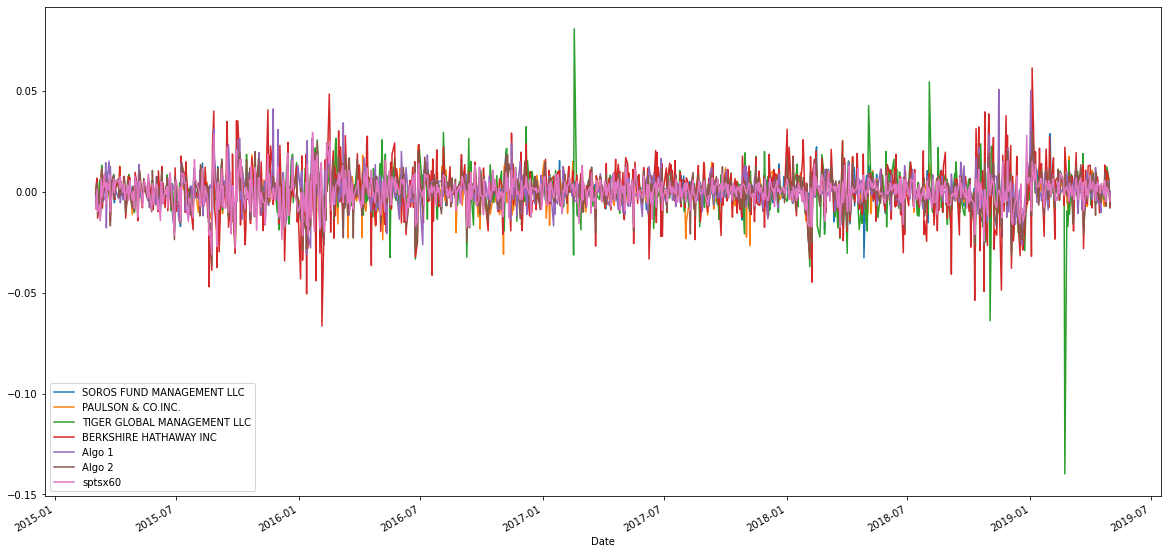

In [286]:
# Plot daily returns of all portfolios
df_daily.plot(figsize = (20,10))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

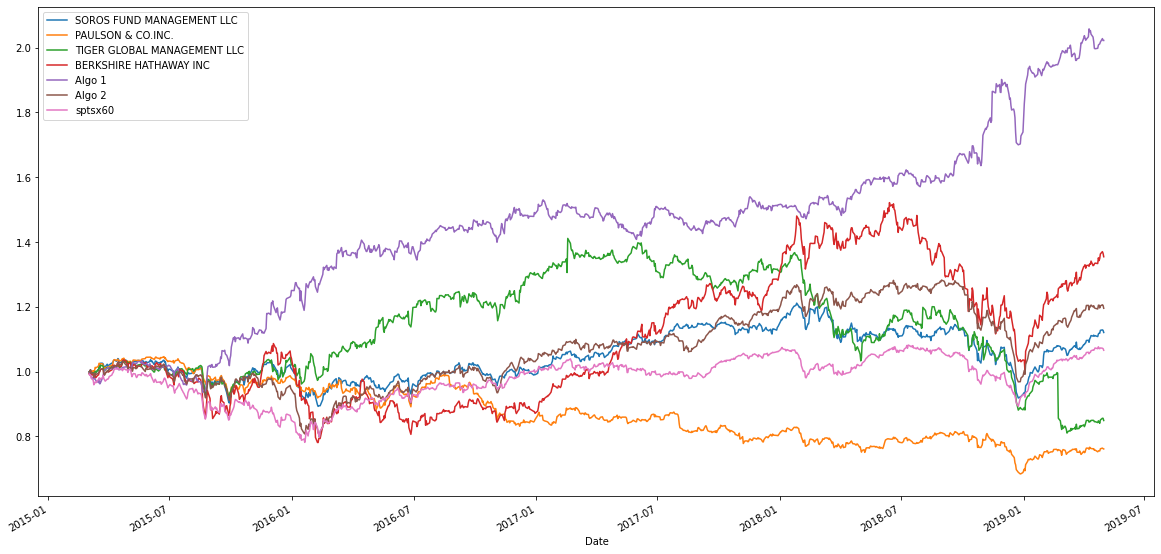

In [287]:

df_cumulative = (1+ df_daily).cumprod()
df_cumulative.plot(figsize = (20,10))


---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:>

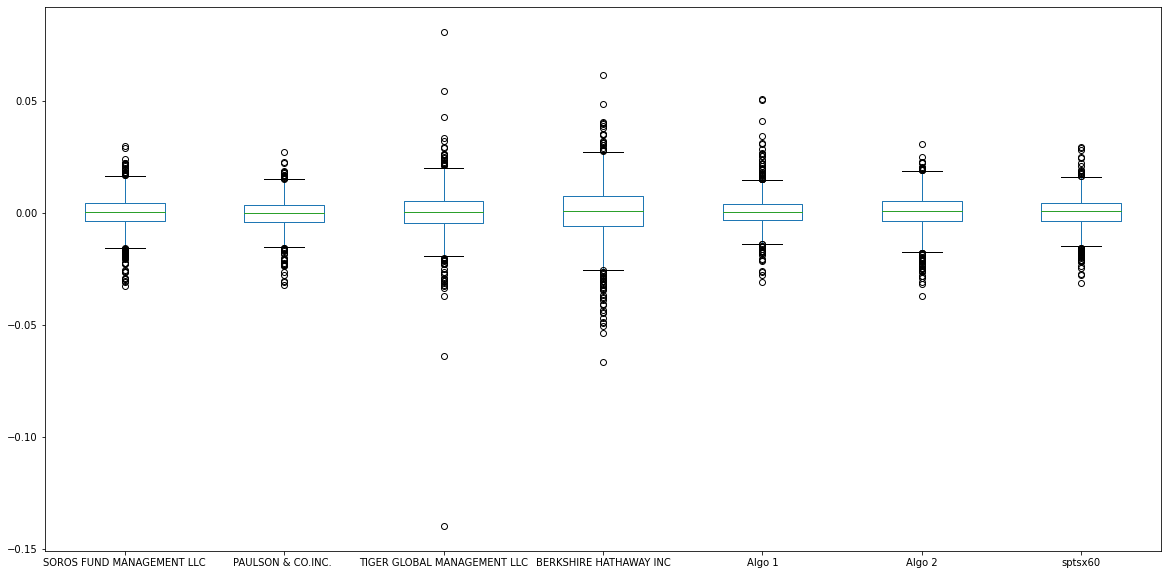

In [288]:
# Box plot to visually show risk
df_daily.plot(kind = "box", figsize = (20,10))

### Calculate Standard Deviations

In [289]:
# Calculate the daily standard deviations of all portfolios
df_daily_SD = pd.DataFrame(df_daily.std()).rename(columns = {0:"std"})
df_daily_SD.head()

,std
SOROS FUND MANAGEMENT LLC,0.007828
PAULSON & CO.INC.,0.006982
TIGER GLOBAL MANAGEMENT LLC,0.010883
BERKSHIRE HATHAWAY INC,0.012826
Algo 1,0.007589


### Determine which portfolios are riskier than the S&P TSX 60

In [290]:
higher_std = df_daily_SD[df_daily_SD["std"] > df_daily_SD.loc["sptsx60", "std"]]
higher_std.head()


,std
SOROS FUND MANAGEMENT LLC,0.007828
TIGER GLOBAL MANAGEMENT LLC,0.010883
BERKSHIRE HATHAWAY INC,0.012826
Algo 1,0.007589
Algo 2,0.008326


In [291]:
print("The 5 portfolios mentioned above are riskier than S&P TSX 60")

The 5 portfolios mentioned above are riskier than S&P TSX 60


### Calculate the Annualized Standard Deviation

In [292]:
# Calculate the annualized standard deviation (252 trading days)
df_ASD = df_daily_SD*np.sqrt(252)
df_ASD.head()

,std
SOROS FUND MANAGEMENT LLC,0.124259
PAULSON & CO.INC.,0.110841
TIGER GLOBAL MANAGEMENT LLC,0.172759
BERKSHIRE HATHAWAY INC,0.203599
Algo 1,0.120470


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P TSX 60 using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

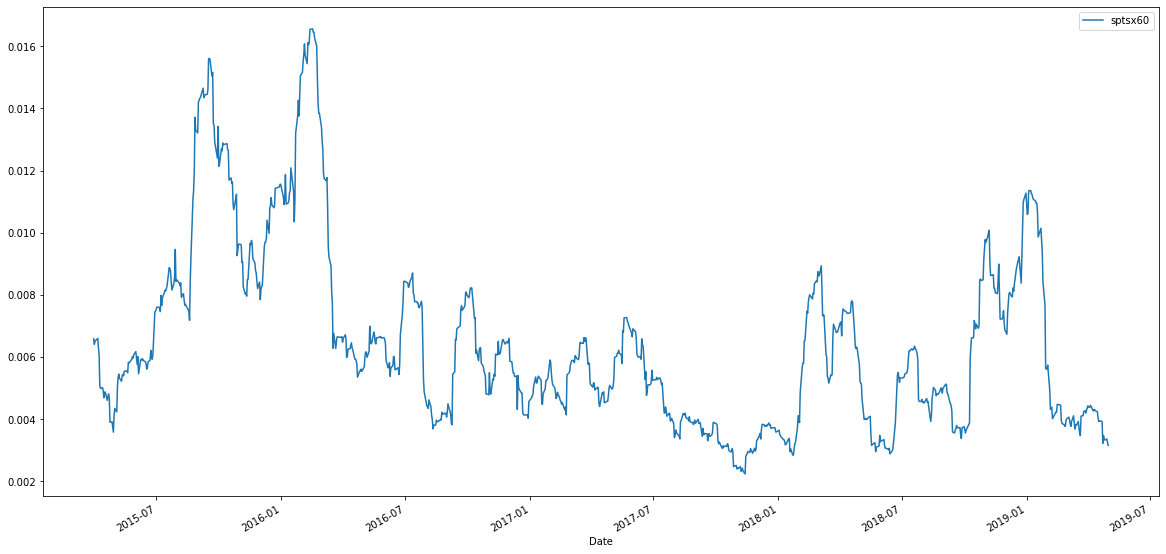

In [293]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
# Plot the rolling standard deviation
sp_tsx60_rolling_21 = df_daily[["sptsx60"]].rolling(window = 21).std()
sp_tsx60_rolling_21.plot(figsize = (20,10))

### Calculate and plot the correlation

In [294]:
# Calculate the correlation
# Display de correlation matrix
correlation_sptsx60 = pd.DataFrame(df_daily.corr()).loc[:,"sptsx60"]
correlation_sptsx60[correlation_sptsx60==correlation_sptsx60[correlation_sptsx60<1].max()]


Algo 2    0.73737
Name: sptsx60, dtype: float64

<AxesSubplot:xlabel='sptsx60', ylabel='Algo 2'>

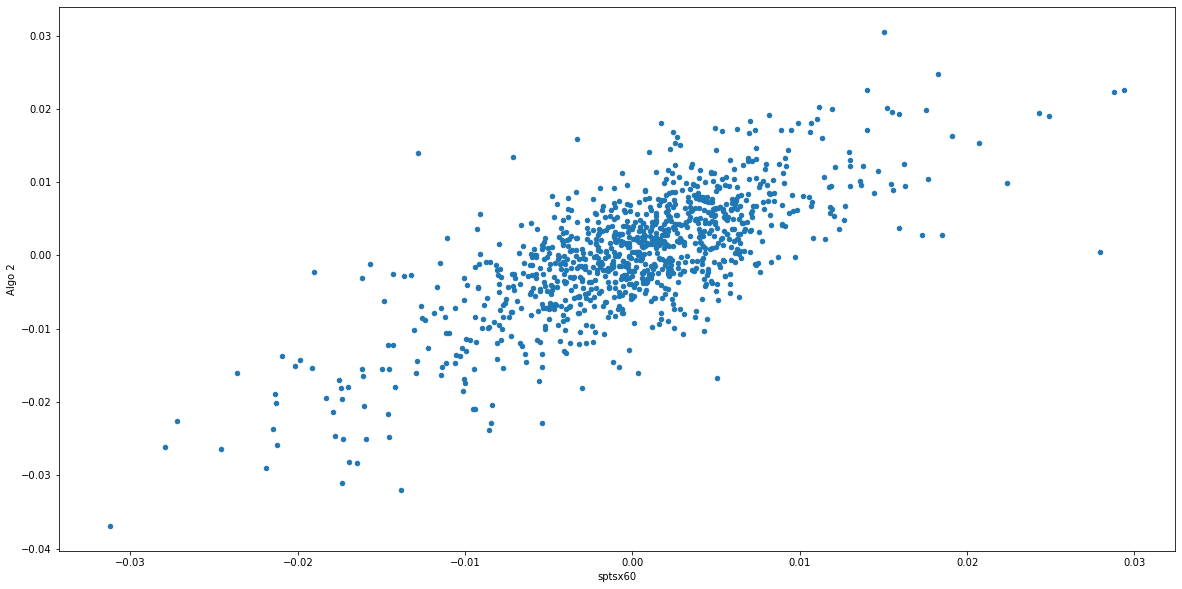

In [295]:
df_daily.plot(kind="scatter", y = "Algo 2", x = "sptsx60", figsize = (20,10))

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

<AxesSubplot:title={'center':'Rolling 60-Day Beta of BRK'}, xlabel='Date'>

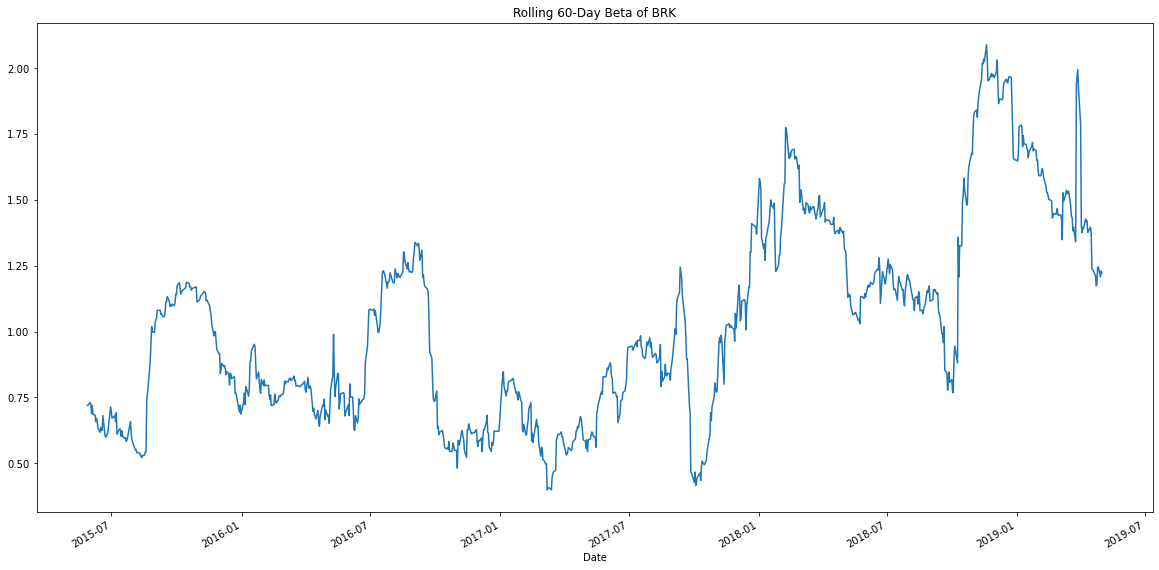

In [296]:
# Calculate covariance of BERKSHIRE HATHAWAY INC
# Calculate variance of S&P TSX
# Computing beta
# Plot beta trend

rolling_covariance = df_daily['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(df_daily['sptsx60'])
rolling_variance = df_daily['sptsx60'].rolling(window=60).var()
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of BRK')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [297]:
# Use `ewm` to calculate the rolling window
df_daily_ewm = df_daily.ewm(span = 21,adjust = False).mean()
(1+df_daily_ewm).cumprod().plot(figsize = (20,10))

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [298]:
# Annualized Sharpe Ratios
sharpe_ratios = df_daily.mean()*252/(df_daily.std()*np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
sptsx60                        0.195550
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

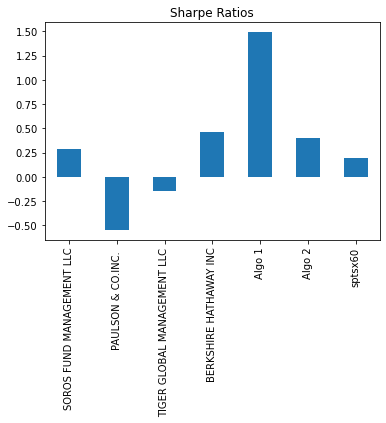

In [299]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind = "bar", title = "Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

Both algorithmic strategies outperformed the market and the whales.

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P TSX 60 index.

* `SHOP` - [Shopify Inc](https://en.wikipedia.org/wiki/Shopify)

* `OTEX` - [Open Text Corporation](https://en.wikipedia.org/wiki/OpenText)

* `L` - [Loblaw Companies Limited](https://en.wikipedia.org/wiki/Loblaw_Companies)

In [300]:
# Reading data from 1st stock
shop_history = pd.read_csv(Path("Resources/shop_historical.csv"), index_col="Date", 
                           parse_dates = True, infer_datetime_format= True)
shop_history.rename(columns = {"Close":"shop"}, inplace = True)
shop_history.head()

,Symbol,shop
Date,,
2018-01-02,SHOP,132.06
2018-01-03,SHOP,135.15
2018-01-04,SHOP,137.46
2018-01-05,SHOP,137.26
2018-01-08,SHOP,139.51


In [301]:
# Reading data from 2nd stock
otex_history = pd.read_csv(Path("Resources/otex_historical.csv"), index_col="Date", 
                           parse_dates = True, infer_datetime_format= True)
otex_history.rename(columns = {"Close":"otex"}, inplace = True)
otex_history.head()

,Symbol,otex
Date,,
2018-01-02,OTEX,43.58
2018-01-03,OTEX,43.07
2018-01-04,OTEX,42.91
2018-01-05,OTEX,42.57
2018-01-08,OTEX,42.16


In [302]:
# Reading data from 3rd stock
L_history = pd.read_csv(Path("Resources/l_historical.csv"), index_col="Date", 
                           parse_dates = True, infer_datetime_format= True)
L_history.rename(columns = {"Close":"L"}, inplace = True)
L_history.head()

,Symbol,L
Date,,
2018-01-02,L,57.99
2018-01-03,L,57.41
2018-01-04,L,57.42
2018-01-05,L,57.42
2018-01-08,L,56.86


In [303]:
# Combine all stocks in a single DataFrame
combined_df = pd.concat((shop_history, otex_history, L_history), axis = 1, join= "inner")
combined_df.sort_index(ascending = True, inplace = True)
combined_df.head()

,Symbol,shop,Symbol,otex,Symbol,L
Date,,,,,,
2018-01-02,SHOP,132.06,OTEX,43.58,L,57.99
2018-01-03,SHOP,135.15,OTEX,43.07,L,57.41
2018-01-04,SHOP,137.46,OTEX,42.91,L,57.42
2018-01-05,SHOP,137.26,OTEX,42.57,L,57.42
2018-01-08,SHOP,139.51,OTEX,42.16,L,56.86


In [304]:
# Reset Date index
combined_df.index = conbined_df.index.normalize()

In [305]:
# Reorganize portfolio data by having a column per symbol


In [306]:
# Calculate daily returns
combined_daily_returns = conbined_df.pct_change()
# Drop NAs
conbined_df.dropna(inplace=True)
# Display sample data
combined_daily_returns.head()

TypeError: unsupported operand type(s) for /: 'str' and 'str'

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [308]:
# Set weights
# Calculate portfolio return
# Display sample data
weights = [1/3, 1/3, 1/3]
my_portfolio = conbinmed_df.dot(weights)
my_portfolio_returns = my_portfolio.pct_change()
my_portfolio_returns.dropna(inplace = True)
my_portfolio_returns.head()

ValueError: Dot product shape mismatch, (501, 6) vs (3,)

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [309]:
# Join your returns DataFrame to the original returns DataFrame
portfolio_returns = pd.concat((my_portfolio_returns,df_daily), axis = 1, join = "inner")
portfolio_returns.rename(columns = {0:"my_portfolio"}, inplace = True)
portfolio_returns

NameError: name 'my_portfolio_returns' is not defined

In [ ]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
portfolio_returns.dropna(inplace=True)
portfolio_returns

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [310]:
# Calculate the annualized `std`
portfolio_std = pd.DataFrame(portfolio_returns.std()).rename(columns = {0:"std"})
portfolio_std

NameError: name 'portfolio_returns' is not defined

### Calculate and plot rolling `std` with 21-day window

In [ ]:
# Calculate rolling standard deviation

# Plot rolling standard deviation


### Calculate and plot the correlation

In [ ]:
# Calculate and plot the correlation


### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

In [ ]:
# Calculate and plot Beta


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Calculate Annualzied Sharpe Ratios


In [ ]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!